This project is about the Titanic data that is use to predict the survival rate of a passenger base on their sex, age, class on the cruise.
For this prediction will be using the Logistic Regression model, this model gives a outcome between 0 and 1 as to the probability
that a person will survive the sinking boat.

# Importing the packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
# To view all columns

pd.options.display.max_columns = None

To view the top 5 rows

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

To view the missing values using heatmap

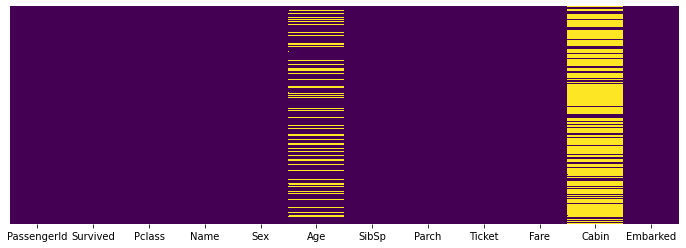

In [5]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [6]:
sns.set_style('whitegrid')

To plot the ratio of actual target labels. 

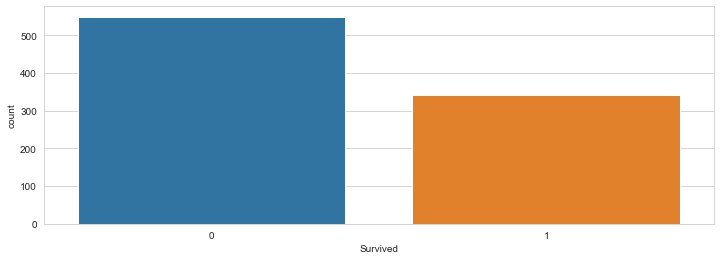

In [7]:
plt.figure(figsize=(12,4))
sns.countplot(x='Survived', data=df);

Above shows that 0 is the people who didn't survive and 1 is the people that did.

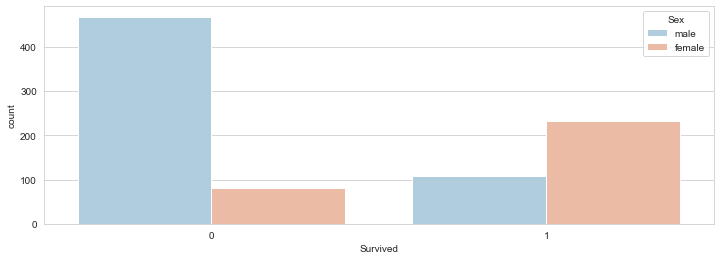

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r');

The above shows the survival rate by sex. More male didn't survive than female and more female survived than male.

To view survival by passenger class

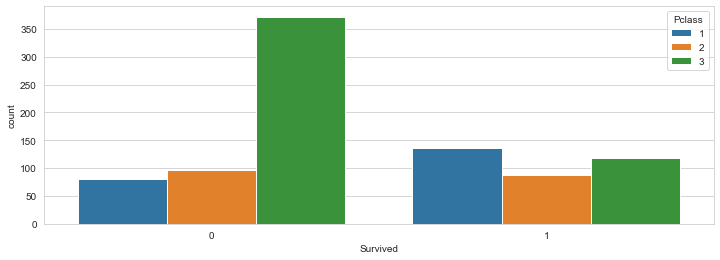

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(x='Survived', hue='Pclass', data=df);

To get the overall look at the age group of all the passengers

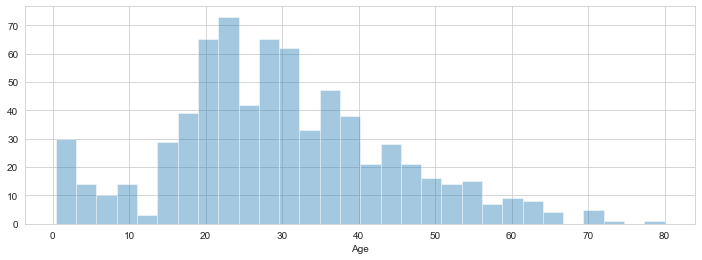

In [10]:
plt.figure(figsize=(12,4))
sns.distplot(df['Age'].dropna(), kde=False, bins=30);

To see the number of people with siblings, spouse or children on board

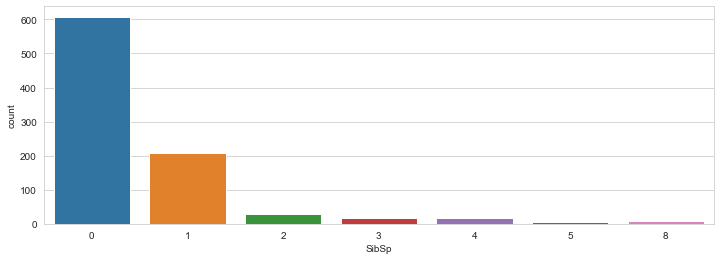

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(x='SibSp', data=df);

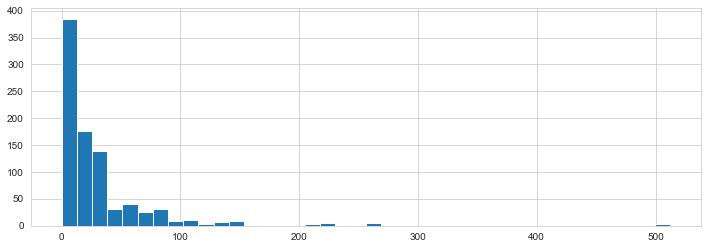

In [12]:
df['Fare'].hist(bins=40, figsize=(12,4));

To make a inter-active plots using cuflinks

In [13]:
import cufflinks as cf

In [14]:
cf.go_offline()

In [15]:
df['Fare'].iplot(kind='hist', bins=45)

# Dealing with missing values

1. From previous plot, we saw that there's a number of missing values in the Age column. We can fix this by filling in the missing
values using the average age per passenger class.

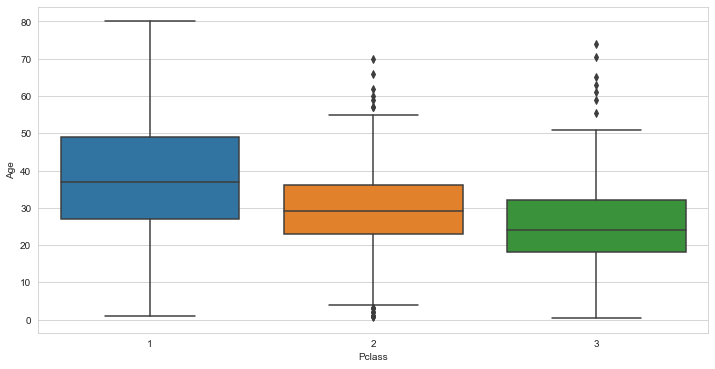

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=df);

Let's create a function which we can use to impute the missing values base on a average age per class

In [17]:
pc1 = df.groupby('Pclass')['Age'].mean()

In [18]:
pc1

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [19]:
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [20]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

Now let's the heatmap again to see if there's any changes in the age column

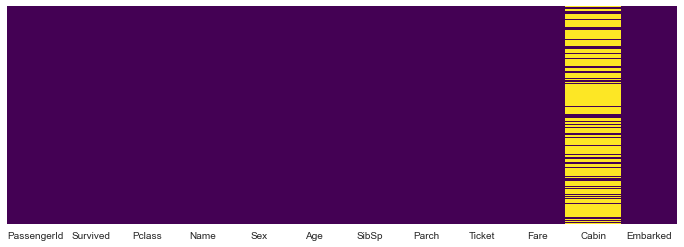

In [21]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

As we can see, there are no longer missing values in the Age column.
2. We can also see that the Cabin column still has missing values and by the looks of things there are too many values missing to
even try to manipulate the values so we can fill the missing ones, what can be done is to drop the column.

In [22]:
df.drop('Cabin', axis=1, inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


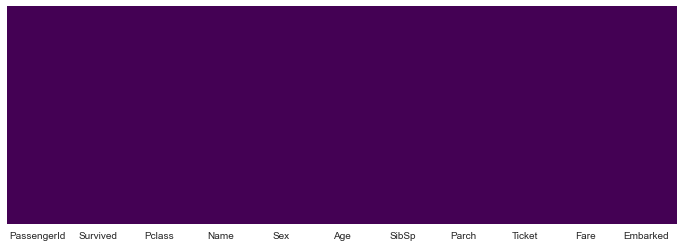

In [24]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
# Change the age column to int

df['Age'] = df['Age'].astype('int')

Now let's get the categorical variables for Sex and Embarked as we that the Regression model can only read numerical value not
strings. So we will have to get the dummy variables for these columns.

In [27]:
dum = [pd.get_dummies(df['Sex'], drop_first=True),
      pd.get_dummies(df['Embarked'], prefix='Embarked', prefix_sep = ':', drop_first=True)]

In [28]:
dum_df = pd.concat(dum, axis=1)

In [29]:
df = pd.concat([df, dum_df], axis=1)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Embarked:Q,Embarked:S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1,0,1


Let's drop the columns that the model won't be able to read the ones we just created dummy variables of.

In [31]:
df.drop(['Name','Sex','Ticket','Embarked','PassengerId'], axis=1, inplace=True)

In [32]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Embarked:Q,Embarked:S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1



# Splitting the data

Now we have to split the data for our train and test features.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
X_train.shape

(623, 8)

In [37]:
X_test.shape

(268, 8)

In [38]:
y_train.shape

(623,)

In [39]:
y_test.shape

(268,)

# Training the model

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

Now we train or fit the model using the train features, X_train and y_train

In [42]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [43]:
predictions = model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[135  19]
 [ 38  76]]


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



Let's see if we can better the Precision and Recall by using the Decision and RandomForest Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtree = DecisionTreeClassifier()

In [53]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
Dtree_pred = dtree.predict(X_test)

In [55]:
print(confusion_matrix(y_test, Dtree_pred))
print('\n')
print(classification_report(y_test, Dtree_pred))

[[134  20]
 [ 39  75]]


              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.66      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [56]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
RFC = RandomForestClassifier(n_estimators=300) 

In [74]:
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [75]:
RFC_pred = RFC.predict(X_test)

In [76]:
print(confusion_matrix(y_test, RFC_pred))
print('\n')
print(classification_report(y_test, RFC_pred))

[[131  23]
 [ 29  85]]


              precision    recall  f1-score   support

           0       0.82      0.85      0.83       154
           1       0.79      0.75      0.77       114

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

